# Introduction

Often, I find myself referring to old code, Youtube videos and Google to remind myself how to achieve certain processing methods with data. I want to use this notebook to put together common tricks I need to use as an analyst.

### Common libraries



In [1]:
import pandas as pd
import numpy as np
import pyodbc #SQL
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

In [2]:
#Working Directory
import os
print(os.getcwd())

C:\Users\Admin\OneDrive\Documents


In [3]:
# When working with large datasets, pandas can take some time running .map(), .apply(), .applymap() operations.
# tqdm is a very useful package that helps predict when theses operations will finish executing

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [4]:
%timeit

In [5]:
#Adjust the display

from IPython.core.display import display, HTML

display(HTML("<style.container {width:70% !important;}</style>"))

### Importing Data

In [6]:
messy_data = pd.read_excel('messy_data.xlsx',
                       sheet_name="messy data",
                           skiprows=6)

messy_data

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
0,NaN,Mid,AAAA,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0
1,NaN,Mid,AAAA,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0
2,NaN,Mid,AAAA,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0
3,NaN,Mid,AAAA,D,4.0,"""4.0""",4.1,$%^*D,0.0,1.0,2005-02-04,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",NaN,NaN,242368.0
4,NaN,Mid,AAAA,E,5.0,"""5.0""",5.1,E#$@%^,1.0,1.0,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.0,NaN,121714.0
5,NaN,Mid,BBBB,F,6.0,"""6.0""",6.1,F#$@%^,2.0,0.0,2010-05-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.0,a,90647.0
6,NaN,Mid,BBBB,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-05,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.0,NaN,85379.0
7,NaN,Mid,BBBB,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,288676.0
8,NaN,Mid,BBBB,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.0,NaN,404477.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Use "r" in front of file path to help get data from another folder

messy_data_other_folder = pd.read_excel(r'messy_data.xlsx',
                                      sheet_name="messy data",
                                      skiprows=6)
messy_data_other_folder.head()

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
0,NaN,Mid,AAAA,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0
1,NaN,Mid,AAAA,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0
2,NaN,Mid,AAAA,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0
3,NaN,Mid,AAAA,D,4.0,"""4.0""",4.1,$%^*D,0.0,1.0,2005-02-04,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",NaN,NaN,242368.0
4,NaN,Mid,AAAA,E,5.0,"""5.0""",5.1,E#$@%^,1.0,1.0,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.0,NaN,121714.0


In [8]:
# Create a copy of dataframe

df = messy_data

In [9]:

# data = pd.read_csv('my_file.csv', sep=';', encoding='latin-1', nrows=1000, skiprows=[2,5])

In [10]:
# pd.read_html

In [11]:
# Get the data


#df3 = pd.read_csv('Data/Carseats.csv').drop('Unnamed: 0', axis=1)

In [12]:
# pd.read_csv('../data/survey_visited.csv', keep_default_na=False)

In [13]:
# pd.read_csv('../data/survey_visited.csv', na_values=[619, 622])

In [14]:
# import zipfile

# CCTzf = zipfile.ZipFile(r'\\tdc1pfile06\analyticsReporting$\ACCC\upload\receive\CCT_traffic-data_FY2019_Q4_csv.zip')

In [15]:

#Create SQL Database from Dataframes

# import sqlite3
# conn = sqlite3.connect('ABSASX.db')


# #Inddf

# c = conn.cursor()
# c.execute("CREATE TABLE IF NOT EXISTS Industry ({})".format(' ,'.join(ABS_Industry.columns)))

# for row in ABS_Industry.iterrows():
#     sql = "INSERT INTO Industry ({}) VALUES ({})".format(' ,'.join(ABS_Industry.columns), ','.join(['?']*len(ABS_Industry.columns)))
#     c.execute(sql, tuple(row[1]))
# conn.commit()

In [16]:
# import pyodbc

# Date_Equals = '201901'

# ACCCSQL = pyodbc.connect("Driver={SQL Server Native Client 11.0};"
#                       "Server=sql-p-bac,65127;"
#                      "Database=AnalyticsReporting_ACCC;"
#                      "Trusted_Connection=yes;")

# ACCCSQL = pd.read_sql_query('SELECT * FROM [AnalyticsReporting_ACCC].[nsw].[TrafficVolume] WHERE [CalendarQtrID] ='+ Date_Equals, ACCCSQL)

# ACCCSQL['Source'] = 'FromSQL'

In [17]:
#From an API

In [18]:
# df = pd.DataFrame.from_dict({
#     'company': 'Pandology', 
#     'metrics': [[{'score': 10}, {'score': 20}, {'score': 35}]]
# })

In [19]:
# Iterating over rows

# dictionary = {}

# for i,row in data.iterrows():
#   dictionary[row['column_1']] = row['column_2']

### Exploring Data

Determining what actually needs to be cleaned

In [20]:
#Tip - set a wider display of columns in preview modes

pd.set_option('display.max_columns', 500)
pd.options.display.max_rows = 50

df

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
0,NaN,Mid,AAAA,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0
1,NaN,Mid,AAAA,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0
2,NaN,Mid,AAAA,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0
3,NaN,Mid,AAAA,D,4.0,"""4.0""",4.1,$%^*D,0.0,1.0,2005-02-04,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",NaN,NaN,242368.0
4,NaN,Mid,AAAA,E,5.0,"""5.0""",5.1,E#$@%^,1.0,1.0,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.0,NaN,121714.0
5,NaN,Mid,BBBB,F,6.0,"""6.0""",6.1,F#$@%^,2.0,0.0,2010-05-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.0,a,90647.0
6,NaN,Mid,BBBB,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-05,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.0,NaN,85379.0
7,NaN,Mid,BBBB,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,288676.0
8,NaN,Mid,BBBB,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.0,NaN,404477.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# See the top of the dataset and specify how many

df.head(5)

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
0,NaN,Mid,AAAA,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0
1,NaN,Mid,AAAA,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0
2,NaN,Mid,AAAA,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0
3,NaN,Mid,AAAA,D,4.0,"""4.0""",4.1,$%^*D,0.0,1.0,2005-02-04,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",NaN,NaN,242368.0
4,NaN,Mid,AAAA,E,5.0,"""5.0""",5.1,E#$@%^,1.0,1.0,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.0,NaN,121714.0


In [22]:
# See the bottom of the dataset and specify how many
# take note of the pesky footer.. We need to remove that...

df.tail(5)

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
16,NaN,Lux,DDDD,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.0,NaN,6135849.0
17,NaN,Lux,DDDD,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,12479711.0
18,NaN,Lux,DDDD,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.0,NaN,18270679.0
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,I am a pesky footer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Use "skipfooter to remove the footer"

df = messy_data_other_folder = pd.read_excel(r'messy_data.xlsx',
                                      sheet_name="messy data",
                                      skiprows=6, skipfooter=2)

df.tail()

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
14,NaN,Lux,CCCC,E,5.0,"""5.0""",5.1,E#$@%^,1.0,1.0,1992-02-14,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",35.0,NaN,8771424.0
15,NaN,Lux,DDDD,F,6.0,"""6.0""",6.1,F#$@%^,2.0,0.0,2010-07-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.0,NaN,7039585.0
16,NaN,Lux,DDDD,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.0,NaN,6135849.0
17,NaN,Lux,DDDD,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,12479711.0
18,NaN,Lux,DDDD,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.0,NaN,18270679.0


In [24]:
# Check the shape 
df.shape # (rows, columns)

(19, 17)

In [25]:
# Check how many rows only in dataframe

len(df)

19

In [26]:
# Look at all the different datatypes in each column of the dataframe

df.dtypes

Unnamed: 0           float64
Col_A                 object
Unnamed: 2            object
Col_B                 object
Col_C                float64
Col_D                 object
Col_E                float64
Col_F                 object
Col_G                float64
Col_H                float64
Col_I         datetime64[ns]
Col_J                 object
Col_K                 object
Col_L                 object
Col_M                float64
Col_N                 object
Col_O                float64
dtype: object

In [27]:
# Sort rows by value - ascending

df.sort_values('Col_C', inplace=True, ascending=True)

df.head()

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
0,NaN,Mid,AAAA,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0
10,NaN,Lux,CCCC,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.0,NaN,14741437.0
1,NaN,Mid,AAAA,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0
11,NaN,Lux,CCCC,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-07-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,9378062.0
2,NaN,Mid,AAAA,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0


In [28]:
# Sort rows by value - descending (biggest number first)

df.sort_values('Col_C', inplace=True, ascending=False)

df.head()

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
18,NaN,Lux,DDDD,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.0,NaN,18270679.0
8,NaN,Mid,BBBB,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.0,NaN,404477.0
17,NaN,Lux,DDDD,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,12479711.0
7,NaN,Mid,BBBB,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,288676.0
16,NaN,Lux,DDDD,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.0,NaN,6135849.0


In [29]:
# Sort rows by text value - ascending (A first)

df.sort_values('Col_B', inplace=True, ascending=True)

df.head()

,Unnamed: 0,Col_A,Unnamed: 2,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O
0,NaN,Mid,AAAA,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0
10,NaN,Lux,CCCC,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.0,NaN,14741437.0
1,NaN,Mid,AAAA,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0
11,NaN,Lux,CCCC,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-07-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,9378062.0
2,NaN,Mid,AAAA,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0


In [30]:
# Sort Columns By Alphabetical Name (opposite direction)

df = df.reindex_axis(sorted(df.columns, reverse=True), axis=1)

df.head()

,Unnamed: 2,Unnamed: 0,Col_O,Col_N,Col_M,Col_L,Col_K,Col_J,Col_I,Col_H,Col_G,Col_F,Col_E,Col_D,Col_C,Col_B,Col_A
0,AAAA,NaN,149341.0,NaN,1.0,"[[a,b,c,d],[b,b,c,d]]","[a,b,c,d]","{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}",1997-02-01,1.0,-3.0,$%^*A,1.1,"""1.0""",1.0,A,Mid
10,CCCC,NaN,14741437.0,NaN,23.0,"[[a,b,c,d],[b,b,c,d]]","[a,b,c,d]","{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}",1997-04-01,1.0,-3.0,$%^*A,1.1,"""1.0""",1.0,A,Lux
1,AAAA,NaN,39500.0,NaN,NaN,"[[b,b,c,d],[c,b,c,d]]","[b,b,c,d]","{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}",2001-05-04,0.0,-2.0,B#$@%^,2.1,"""2.0""",2.0,B,Mid
11,CCCC,NaN,9378062.0,NaN,NaN,"[[b,b,c,d],[c,b,c,d]]","[b,b,c,d]","{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}",2001-07-04,0.0,-2.0,B#$@%^,2.1,"""2.0""",2.0,B,Lux
2,AAAA,NaN,120952.0,NaN,3.0,"[[c,b,c,d],[d,b,c,d]]","[c,b,c,d]","{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}",2020-06-05,0.0,-1.0,$%^*C,3.1,"""3.0""",3.0,C,Mid


In [31]:
# Sort Columns By Alphabetical Name

df = df.reindex_axis(sorted(df.columns), axis=1)

df.head()

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Unnamed: 0,Unnamed: 2
0,Mid,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0,NaN,AAAA
10,Lux,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.0,NaN,14741437.0,NaN,CCCC
1,Mid,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,39500.0,NaN,AAAA
11,Lux,B,2.0,"""2.0""",2.1,B#$@%^,-2.0,0.0,2001-07-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",NaN,NaN,9378062.0,NaN,CCCC
2,Mid,C,3.0,"""3.0""",3.1,$%^*C,-1.0,0.0,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.0,NaN,120952.0,NaN,AAAA


In [32]:
# Sort values using two columns

df = df.sort_values(by=['Col_B','Col_O'], ascending=False)

df.head()

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Unnamed: 0,Unnamed: 2
18,Lux,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.0,NaN,18270679.0,NaN,DDDD
8,Mid,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.0,NaN,404477.0,NaN,BBBB
17,Lux,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,12479711.0,NaN,DDDD
7,Mid,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,288676.0,NaN,BBBB
16,Lux,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.0,NaN,6135849.0,NaN,DDDD


In [33]:
# Create a series to demonstrate how loc and iloc works

series = pd.Series(['Hello', 'Goodbye'], index=['AA', 'BB'])

print(series.loc['AA'])
print(series.loc['BB'])
print("-----------------")
print(series.iloc[0])
print(series.iloc[1])

Hello
Goodbye
-----------------
Hello
Goodbye


In [34]:
# Without print

series.loc["AA"]

'Hello'

In [35]:
# Without print

series.iloc[0]

'Hello'

In [36]:
# Find how many unique values
df.nunique()

Col_A          2
Col_B          9
Col_C          9
Col_D          9
Col_E          9
Col_F          9
Col_G          9
Col_H          2
Col_I         18
Col_J          9
Col_K          9
Col_L          9
Col_M         12
Col_N          1
Col_O         18
Unnamed: 0     0
Unnamed: 2     4
dtype: int64

In [37]:
# Find the unique values in a single column

df.Col_C.unique()

array([ 9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1., nan])

In [38]:
# how many values in each unique variable

df.Col_B.value_counts()

# Or
# df['Col_C'].value_counts()

D    2
C    2
G    2
I    2
F    2
E    2
H    2
B    2
A    2
Name: Col_B, dtype: int64

In [39]:
# count the number of values per year in the dataframe
df.Col_I.dt.year.value_counts()

1997.0    2
2001.0    2
2020.0    2
2005.0    2
1992.0    2
2010.0    2
2011.0    2
2004.0    2
2002.0    2
Name: Col_I, dtype: int64

In [40]:
# Put a Column (series) into a list

df_list = df.Col_C.unique().tolist()
df_list

[9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 2.0, 1.0, nan]

In [41]:
# Maximum value of a column (series)

df['Col_O'].max()


18270679.0

In [42]:
# What is the total value of Col_O, where Col_A = "mid"

df['Col_O'][df['Col_A'] == 'Mid'].sum()

1543054.0

In [43]:
# Count the number of rows where Col_A is equal to the text "Lux":

len(df[df['Col_A'] == "Lux"])

9

In [44]:
# Count the number of rows where Col_G is equal to the value 5:

len(df[df['Col_G'] == 5])

2

In [45]:
# Select rows 0, 1, 2 
df[0:3]

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Unnamed: 0,Unnamed: 2
18,Lux,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.0,NaN,18270679.0,NaN,DDDD
8,Mid,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.0,NaN,404477.0,NaN,BBBB
17,Lux,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,12479711.0,NaN,DDDD


In [46]:
# Select the first 5 rows (rows 0, 1, 2, 3, 4)
df[:5]

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Unnamed: 0,Unnamed: 2
18,Lux,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.0,NaN,18270679.0,NaN,DDDD
8,Mid,I,9.0,"""9.0""",9.1,$%^*I,5.0,1.0,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.0,NaN,404477.0,NaN,BBBB
17,Lux,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,12479711.0,NaN,DDDD
7,Mid,H,8.0,"""8.0""",8.1,$%^*H,4.0,0.0,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",NaN,NaN,288676.0,NaN,BBBB
16,Lux,G,7.0,"""7.0""",7.1,G#$@%^,3.0,0.0,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.0,NaN,6135849.0,NaN,DDDD


In [47]:
# Select the last row in the dataframe

df[-1:]

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Unnamed: 0,Unnamed: 2
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# iloc[row slice, column slice]
df.iloc[0:3, 1:4]

,Col_B,Col_C,Col_D
18,I,9.0,"""9.0"""
8,I,9.0,"""9.0"""
17,H,8.0,"""8.0"""


In [49]:
# Select all columns for rows of index values 0 and 10
df.loc[[0, 10], :]

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Unnamed: 0,Unnamed: 2
0,Mid,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.0,NaN,149341.0,NaN,AAAA
10,Lux,A,1.0,"""1.0""",1.1,$%^*A,-3.0,1.0,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.0,NaN,14741437.0,NaN,CCCC


In [50]:
# Slice notation is start:stop:step

# slice from 'Col_A' to 'Col_G' by every 2nd column (and get all the rows)
df.loc[:, 'Col_A':'Col_G':2]

,Col_A,Col_C,Col_E,Col_G
18,Lux,9.0,9.1,5.0
8,Mid,9.0,9.1,5.0
17,Lux,8.0,8.1,4.0
7,Mid,8.0,8.1,4.0
16,Lux,7.0,7.1,3.0
6,Mid,7.0,7.1,3.0
15,Lux,6.0,6.1,2.0
5,Mid,6.0,6.1,2.0
14,Lux,5.0,5.1,1.0
4,Mid,5.0,5.1,1.0


In [51]:
# slice from the beginning to 'Col_G'
df.loc[:, :'Col_G']


,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G
18,Lux,I,9.0,"""9.0""",9.1,$%^*I,5.0
8,Mid,I,9.0,"""9.0""",9.1,$%^*I,5.0
17,Lux,H,8.0,"""8.0""",8.1,$%^*H,4.0
7,Mid,H,8.0,"""8.0""",8.1,$%^*H,4.0
16,Lux,G,7.0,"""7.0""",7.1,G#$@%^,3.0
6,Mid,G,7.0,"""7.0""",7.1,G#$@%^,3.0
15,Lux,F,6.0,"""6.0""",6.1,F#$@%^,2.0
5,Mid,F,6.0,"""6.0""",6.1,F#$@%^,2.0
14,Lux,E,5.0,"""5.0""",5.1,E#$@%^,1.0
4,Mid,E,5.0,"""5.0""",5.1,E#$@%^,1.0


In [52]:
# slice from Col_G to the end by 3 steps at a time
df.loc[:, 'Col_G'::3]

,Col_G,Col_J,Col_M,Unnamed: 0
18,5.0,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}",768.0,NaN
8,5.0,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}",9.0,NaN
17,4.0,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}",NaN,NaN
7,4.0,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}",NaN,NaN
16,3.0,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}",34.0,NaN
6,3.0,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}",7.0,NaN
15,2.0,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}",535.0,NaN
5,2.0,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}",6.0,NaN
14,1.0,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}",35.0,NaN
4,1.0,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}",5.0,NaN


In [53]:
# Select all rows from Col_A to Col_C
df.loc[:, 'Col_A':'Col_C']

,Col_A,Col_B,Col_C
18,Lux,I,9.0
8,Mid,I,9.0
17,Lux,H,8.0
7,Mid,H,8.0
16,Lux,G,7.0
6,Mid,G,7.0
15,Lux,F,6.0
5,Mid,F,6.0
14,Lux,E,5.0
4,Mid,E,5.0


In [54]:
# slice from 'Col_G' to 'Col_A' - "Going Backwards"
df.loc[:, 'Col_G':'Col_A':-1]

,Col_G,Col_F,Col_E,Col_D,Col_C,Col_B,Col_A
18,5.0,$%^*I,9.1,"""9.0""",9.0,I,Lux
8,5.0,$%^*I,9.1,"""9.0""",9.0,I,Mid
17,4.0,$%^*H,8.1,"""8.0""",8.0,H,Lux
7,4.0,$%^*H,8.1,"""8.0""",8.0,H,Mid
16,3.0,G#$@%^,7.1,"""7.0""",7.0,G,Lux
6,3.0,G#$@%^,7.1,"""7.0""",7.0,G,Mid
15,2.0,F#$@%^,6.1,"""6.0""",6.0,F,Lux
5,2.0,F#$@%^,6.1,"""6.0""",6.0,F,Mid
14,1.0,E#$@%^,5.1,"""5.0""",5.0,E,Lux
4,1.0,E#$@%^,5.1,"""5.0""",5.0,E,Mid


In [55]:
# select specific columns with a list

df.loc[:, ['Col_A','Col_D','Col_G']]

,Col_A,Col_D,Col_G
18,Lux,"""9.0""",5.0
8,Mid,"""9.0""",5.0
17,Lux,"""8.0""",4.0
7,Mid,"""8.0""",4.0
16,Lux,"""7.0""",3.0
6,Mid,"""7.0""",3.0
15,Lux,"""6.0""",2.0
5,Mid,"""6.0""",2.0
14,Lux,"""5.0""",1.0
4,Mid,"""5.0""",1.0


In [56]:
# Check the info 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 18 to 9
Data columns (total 17 columns):
Col_A         18 non-null object
Col_B         18 non-null object
Col_C         18 non-null float64
Col_D         18 non-null object
Col_E         18 non-null float64
Col_F         18 non-null object
Col_G         18 non-null float64
Col_H         18 non-null float64
Col_I         18 non-null datetime64[ns]
Col_J         18 non-null object
Col_K         18 non-null object
Col_L         18 non-null object
Col_M         12 non-null float64
Col_N         1 non-null object
Col_O         18 non-null float64
Unnamed: 0    0 non-null float64
Unnamed: 2    18 non-null object
dtypes: datetime64[ns](1), float64(7), object(9)
memory usage: 3.3+ KB


In [57]:
# Count the different number of data types in the dataframe

df.dtypes.value_counts()

object            9
float64           7
datetime64[ns]    1
dtype: int64

In [58]:
# Create a sub-dataframe with only numerical features

df_num = df.select_dtypes(include=['float64', 'int64'])

df_num

,Col_C,Col_E,Col_G,Col_H,Col_M,Col_O,Unnamed: 0
18,9.0,9.1,5.0,1.0,768.0,18270679.0,NaN
8,9.0,9.1,5.0,1.0,9.0,404477.0,NaN
17,8.0,8.1,4.0,0.0,NaN,12479711.0,NaN
7,8.0,8.1,4.0,0.0,NaN,288676.0,NaN
16,7.0,7.1,3.0,0.0,34.0,6135849.0,NaN
6,7.0,7.1,3.0,0.0,7.0,85379.0,NaN
15,6.0,6.1,2.0,0.0,535.0,7039585.0,NaN
5,6.0,6.1,2.0,0.0,6.0,90647.0,NaN
14,5.0,5.1,1.0,1.0,35.0,8771424.0,NaN
4,5.0,5.1,1.0,1.0,5.0,121714.0,NaN


In [59]:
# Check the stats
df_num.describe()

,Col_C,Col_E,Col_G,Col_H,Col_M,Col_O,Unnamed: 0
count,18.000000,18.000000,18.000000,18.000000,12.000000,1.800000e+01,0.0
mean,5.000000,5.100000,1.000000,0.444444,147.583333,5.881117e+06,NaN
std,2.656845,2.656845,2.656845,0.511310,258.811078,6.484827e+06,NaN
min,1.000000,1.100000,-3.000000,0.000000,1.000000,3.950000e+04,NaN
25%,3.000000,3.100000,-1.000000,0.000000,5.750000,1.286208e+05,NaN
50%,5.000000,5.100000,1.000000,0.000000,16.000000,3.270163e+06,NaN
75%,7.000000,7.100000,3.000000,1.000000,112.500000,1.170430e+07,NaN
max,9.000000,9.100000,5.000000,1.000000,768.000000,1.827068e+07,NaN


In [60]:
# Show rows values greater than the mean of Col_O
df_num[df_num["Col_O"] > df_num["Col_O"].mean()]

,Col_C,Col_E,Col_G,Col_H,Col_M,Col_O,Unnamed: 0
18,9.0,9.1,5.0,1.0,768.0,18270679.0,NaN
17,8.0,8.1,4.0,0.0,NaN,12479711.0,NaN
16,7.0,7.1,3.0,0.0,34.0,6135849.0,NaN
15,6.0,6.1,2.0,0.0,535.0,7039585.0,NaN
14,5.0,5.1,1.0,1.0,35.0,8771424.0,NaN
13,4.0,4.1,0.0,1.0,NaN,13690150.0,NaN
12,3.0,3.1,-1.0,0.0,345.0,13810159.0,NaN
11,2.0,2.1,-2.0,0.0,NaN,9378062.0,NaN
10,1.0,1.1,-3.0,1.0,23.0,14741437.0,NaN


In [61]:
# See the variance
pd.set_option('float_format', '{:f}'.format)

df_num.var()

Col_C                     7.058824
Col_E                     7.058824
Col_G                     7.058824
Col_H                     0.261438
Col_M                 66983.174242
Col_O        42052980104775.234375
Unnamed: 0                     nan
dtype: float64

In [62]:
# Find how many null values

df.isnull().sum()

Col_A          1
Col_B          1
Col_C          1
Col_D          1
Col_E          1
Col_F          1
Col_G          1
Col_H          1
Col_I          1
Col_J          1
Col_K          1
Col_L          1
Col_M          7
Col_N         18
Col_O          1
Unnamed: 0    19
Unnamed: 2     1
dtype: int64

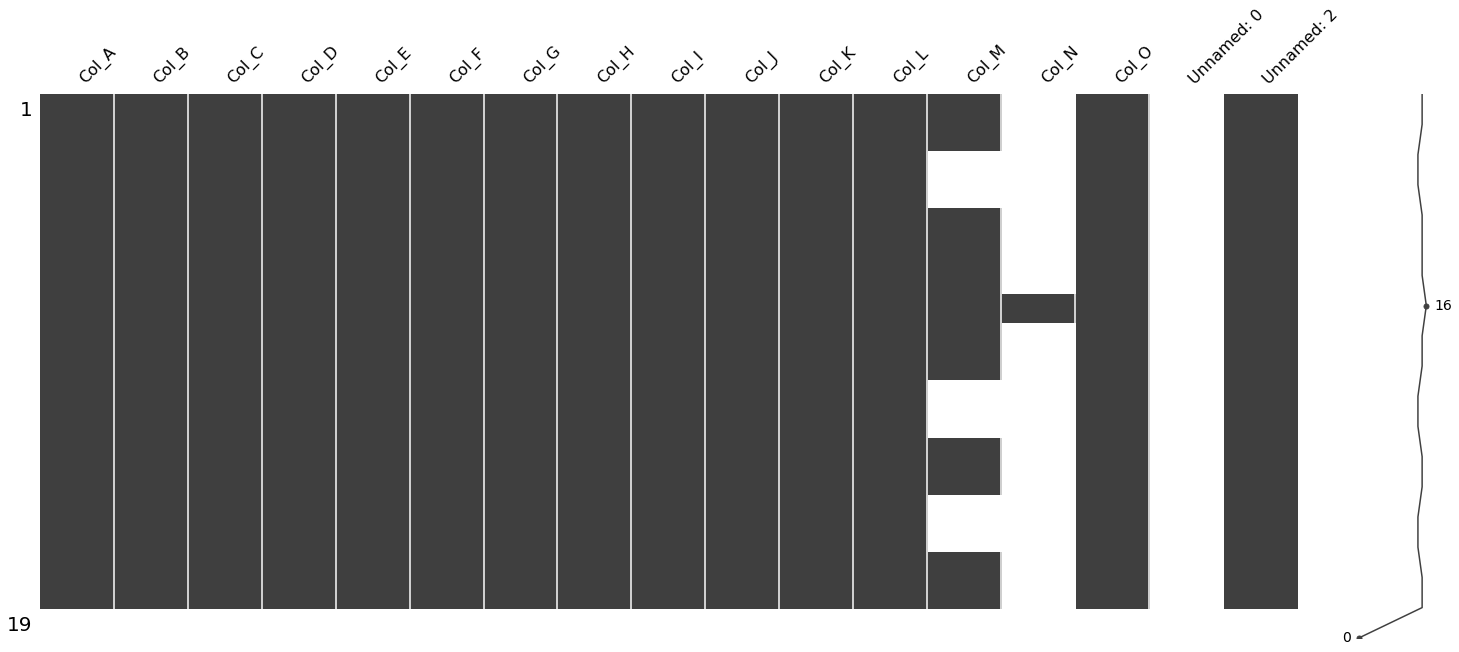

In [63]:
#Visually look to see how much missing data there is

import missingno as msno

msno.matrix(df)

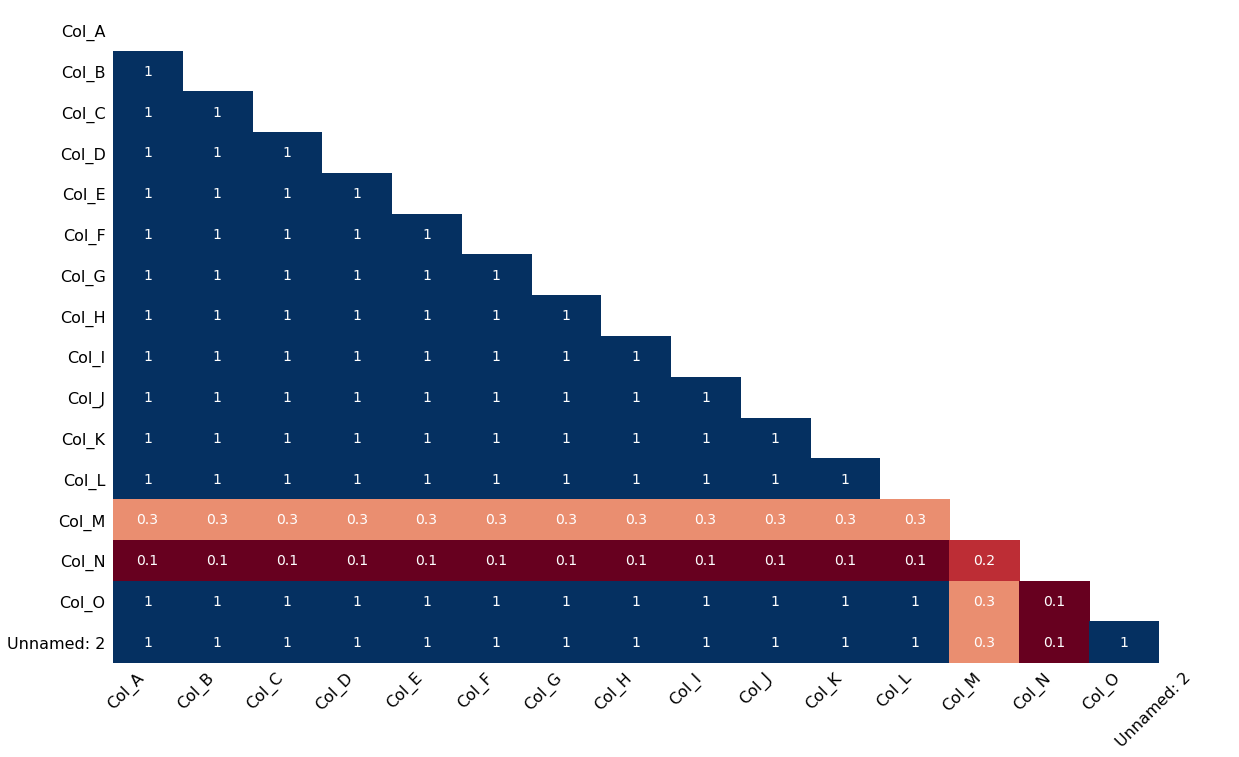

In [64]:
#Visual heatmap of missing data

msno.heatmap(df)

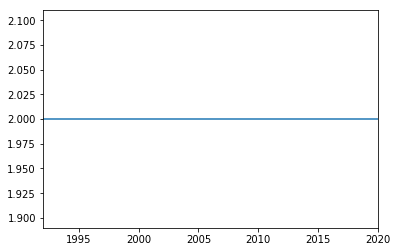

In [65]:
# Need to sort the index before plotting
df.Col_I.dt.year.value_counts().sort_index().plot()

### Reorientate the Data

In [66]:
# Rename all columns

df.columns = ["Col_A", "Col_B", "Col_C", "Col_D", "Col_E",
"Col_F", "Col_G", "Col_H", "Col_I", "Col_J",
"Col_K", "Col_L", "Col_M", "Col_N", "Col_O",
"Col_P", "Col_Q"]

df.head()

,Col_A,Col_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Col_P,Col_Q
18,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD
8,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB
17,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD
7,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB
16,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD


In [67]:
df.rename(columns={'Col_A' : 'Column_A',
                        'Col_B' : 'Column_B'},
                  inplace=True)

df.head()

,Column_A,Column_B,Col_C,Col_D,Col_E,Col_F,Col_G,Col_H,Col_I,Col_J,Col_K,Col_L,Col_M,Col_N,Col_O,Col_P,Col_Q
18,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD
8,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB
17,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD
7,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB
16,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD


In [68]:
# Make all columns lowercase
df.columns = map(str.lower, df.columns)

df.head()

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
18,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD
8,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB
17,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-12-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD
7,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB
16,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD


In [69]:
# Filter all rows that have valid values (not null)
print(df.shape)

df_non_nan = df[pd.notnull(df['col_m'])]

print(df_non_nan.shape)

df_non_nan

(19, 17)
(12, 17)


,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
18,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-13,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD
8,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB
16,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD
6,Mid,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-05,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.000000,NaN,85379.000000,nan,BBBB
15,Lux,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-07-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.000000,NaN,7039585.000000,nan,DDDD
5,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-05-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB
14,Lux,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,1992-02-14,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",35.000000,NaN,8771424.000000,nan,CCCC
4,Mid,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.000000,NaN,121714.000000,nan,AAAA
12,Lux,C,3.000000,"""3.0""",3.100000,$%^*C,-1.000000,0.000000,2020-08-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",345.000000,NaN,13810159.000000,nan,CCCC
2,Mid,C,3.000000,"""3.0""",3.100000,$%^*C,-1.000000,0.000000,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.000000,NaN,120952.000000,nan,AAAA


In [70]:
# Filter rows based on a value
df_negative = df[df['col_g'] < 0]

df_negative

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
12,Lux,C,3.000000,"""3.0""",3.100000,$%^*C,-1.000000,0.000000,2020-08-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",345.000000,NaN,13810159.000000,nan,CCCC
2,Mid,C,3.000000,"""3.0""",3.100000,$%^*C,-1.000000,0.000000,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.000000,NaN,120952.000000,nan,AAAA
11,Lux,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-07-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,9378062.000000,nan,CCCC
1,Mid,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,39500.000000,nan,AAAA
10,Lux,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.000000,NaN,14741437.000000,nan,CCCC
0,Mid,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.000000,NaN,149341.000000,nan,AAAA


In [71]:
filter_col_b = ["A", "B", "F"]

filtered_df = df.loc[df['column_b'].isin(filter_col_b)]
filtered_df

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
15,Lux,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-07-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.000000,NaN,7039585.000000,nan,DDDD
5,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-05-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB
11,Lux,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-07-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,9378062.000000,nan,CCCC
1,Mid,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,39500.000000,nan,AAAA
10,Lux,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.000000,NaN,14741437.000000,nan,CCCC
0,Mid,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.000000,NaN,149341.000000,nan,AAAA


In [72]:
# Filter rows based on multiple values
df_mult_val = df[(df['column_b'] == 'A') & (df['col_g'] < 0)]
df_mult_val

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
10,Lux,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.000000,NaN,14741437.000000,nan,CCCC
0,Mid,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.000000,NaN,149341.000000,nan,AAAA


In [73]:
# Filter rows that contain a string
df_contains_string = df[df['column_a'].str.contains('id', na=False)]
df_contains_string

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
8,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,2002-02-04,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB
7,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,2004-02-04,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB
6,Mid,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-05,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.000000,NaN,85379.000000,nan,BBBB
5,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-05-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB
4,Mid,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.000000,NaN,121714.000000,nan,AAAA
3,Mid,D,4.000000,"""4.0""",4.100000,$%^*D,0.000000,1.000000,2005-02-04,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",nan,NaN,242368.000000,nan,AAAA
2,Mid,C,3.000000,"""3.0""",3.100000,$%^*C,-1.000000,0.000000,2020-06-05,"{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","[c,b,c,d]","[[c,b,c,d],[d,b,c,d]]",3.000000,NaN,120952.000000,nan,AAAA
1,Mid,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,39500.000000,nan,AAAA
0,Mid,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.000000,NaN,149341.000000,nan,AAAA


In [74]:
# Filter rows containing some of the strings
some_strings = df[df['col_f'].str.contains('|'.join(['#', '@']), na=False)]
some_strings

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
16,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-08,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD
6,Mid,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,2011-06-05,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.000000,NaN,85379.000000,nan,BBBB
15,Lux,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-07-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.000000,NaN,7039585.000000,nan,DDDD
5,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,2010-05-04,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB
14,Lux,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,1992-02-14,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",35.000000,NaN,8771424.000000,nan,CCCC
4,Mid,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,1992-02-01,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.000000,NaN,121714.000000,nan,AAAA
11,Lux,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-07-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,9378062.000000,nan,CCCC
1,Mid,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,2001-05-04,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,39500.000000,nan,AAAA


In [75]:
#Filter with regex
df_regex = df[df.column_b.str.contains('^A', na=False)]
df_regex


,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_i,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
10,Lux,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-04-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",23.000000,NaN,14741437.000000,nan,CCCC
0,Mid,A,1.000000,"""1.0""",1.100000,$%^*A,-3.000000,1.000000,1997-02-01,"{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","[a,b,c,d]","[[a,b,c,d],[b,b,c,d]]",1.000000,NaN,149341.000000,nan,AAAA


In [76]:
# Filter for a date range
# When index is the date

df_date = df
df_date["col_i"] = pd.to_datetime(df['col_i'])
df_date.set_index("col_i", inplace=True)

df_date['2000-01-01':'2010-01-01']

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
col_i,,,,,,,,,,,,,,,,
2002-02-13,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD
2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB
2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD
2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB
2005-09-04,Lux,D,4.000000,"""4.0""",4.100000,$%^*D,0.000000,1.000000,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",nan,NaN,13690150.000000,nan,CCCC
2005-02-04,Mid,D,4.000000,"""4.0""",4.100000,$%^*D,0.000000,1.000000,"{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","[d,b,c,d]","[[d,b,c,d],[e,b,c,d]]",nan,NaN,242368.000000,nan,AAAA
2001-07-04,Lux,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,9378062.000000,nan,CCCC
2001-05-04,Mid,B,2.000000,"""2.0""",2.100000,B#$@%^,-2.000000,0.000000,"{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","[b,b,c,d]","[[b,b,c,d],[c,b,c,d]]",nan,NaN,39500.000000,nan,AAAA


In [77]:
# Let’s create a column that computes a rolling sum over a 4 window period 
df['rolling_sum'] = df.col_e.rolling(4).sum()
df.head(10)

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum
col_i,,,,,,,,,,,,,,,,,
2002-02-13,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD,nan
2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB,nan
2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD,nan
2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB,34.400000
2011-06-08,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD,32.400000
2011-06-05,Mid,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.000000,NaN,85379.000000,nan,BBBB,30.400000
2010-07-04,Lux,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.000000,NaN,7039585.000000,nan,DDDD,28.400000
2010-05-04,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB,26.400000
1992-02-14,Lux,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",35.000000,NaN,8771424.000000,nan,CCCC,24.400000


In [78]:
# To remove Nans from rolling sum column apply backfill to the data

df['rolling_sum_backfill'] = df['rolling_sum'].fillna(method='backfill')
df.head(10)

,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill
col_i,,,,,,,,,,,,,,,,,,
2002-02-13,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD,nan,34.400000
2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB,nan,34.400000
2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD,nan,34.400000
2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB,34.400000,34.400000
2011-06-08,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD,32.400000,32.400000
2011-06-05,Mid,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.000000,NaN,85379.000000,nan,BBBB,30.400000,30.400000
2010-07-04,Lux,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.000000,NaN,7039585.000000,nan,DDDD,28.400000,28.400000
2010-05-04,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB,26.400000,26.400000
1992-02-14,Lux,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",35.000000,NaN,8771424.000000,nan,CCCC,24.400000,24.400000


In [79]:
df.reset_index(inplace=True)

df.loc[range(1,5)]

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill
1,2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB,nan,34.400000
2,2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD,nan,34.400000
3,2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB,34.400000,34.400000
4,2011-06-08,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD,32.400000,32.400000


In [80]:
# The .map() operation applies a function to each element of a column.

df["map_function"] = df["col_c"].map(lambda x: x * 100000000)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function
0,2002-02-13,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000
1,2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB,nan,34.400000,900000000.000000
2,2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000
3,2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000
4,2011-06-08,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000


In [81]:
# Turn pandas series into a dictionary

s = pd.Series([1, 2, 3, 4])
s.to_dict()

{0: 1, 1: 2, 2: 3, 3: 4}

In [82]:
# Change Series to Array (or numpy array)

x = df["col_e"].values

print(type(x))
x

<class 'numpy.ndarray'>


array([9.1, 9.1, 8.1, 8.1, 7.1, 7.1, 6.1, 6.1, 5.1, 5.1, 4.1, 4.1, 3.1,
       3.1, 2.1, 2.1, 1.1, 1.1, nan])

In [83]:
# Change Series to List

x = df["col_e"].tolist()

print(type(x))
x

<class 'list'>


[9.1,
 9.1,
 8.1,
 8.1,
 7.1,
 7.1,
 6.1,
 6.1,
 5.1,
 5.1,
 4.1,
 4.1,
 3.1,
 3.1,
 2.1,
 2.1,
 1.1,
 1.1,
 nan]

In [84]:
groupby0 = df.groupby('column_a', axis=0).sum().fillna(0)
groupby0

,col_c,col_e,col_g,col_h,col_m,col_o,col_p,rolling_sum,rolling_sum_backfill,map_function
column_a,,,,,,,,,,
Lux,45.000000,45.900000,9.000000,4.000000,1740.000000,104317056.000000,0.000000,142.800000,211.600000,4500000000.000000
Mid,45.000000,45.900000,9.000000,4.000000,31.000000,1543054.000000,0.000000,163.200000,197.600000,4500000000.000000


In [85]:
# Use groupby 
groupby1 = df.groupby('column_a')['column_b'].value_counts().fillna(0)
groupby1

column_a  column_b
Lux       A           1
          B           1
          C           1
          D           1
          E           1
          F           1
          G           1
          H           1
          I           1
Mid       A           1
          B           1
          C           1
          D           1
          E           1
          F           1
          G           1
          H           1
          I           1
Name: column_b, dtype: int64

In [86]:
groupby2 = df.groupby(['column_a', 'column_b']).agg({'col_o':'mean'})
groupby2

col_o
column_a column_b                
Lux      A        14741437.000000
         B         9378062.000000
         C        13810159.000000
         D        13690150.000000
         E         8771424.000000
         F         7039585.000000
         G         6135849.000000
         H        12479711.000000
         I        18270679.000000
Mid      A          149341.000000
         B           39500.000000
         C          120952.000000
         D          242368.000000
         E          121714.000000
         F           90647.000000
         G           85379.000000
         H          288676.000000
         I          404477.000000

In [87]:
# Groupby

multi_groupby = (df
    .groupby(['column_a', 'column_b'])[['col_c', 'col_o']]
    .mean()
    .reset_index()
)

multi_groupby

,column_a,column_b,col_c,col_o
0,Lux,A,1.000000,14741437.000000
1,Lux,B,2.000000,9378062.000000
2,Lux,C,3.000000,13810159.000000
3,Lux,D,4.000000,13690150.000000
4,Lux,E,5.000000,8771424.000000
5,Lux,F,6.000000,7039585.000000
6,Lux,G,7.000000,6135849.000000
7,Lux,H,8.000000,12479711.000000
8,Lux,I,9.000000,18270679.000000
9,Mid,A,1.000000,149341.000000


In [88]:
# Reset the index so that you can get repeated values in the columns

groupby3 = df.groupby(['column_a', 'column_b']).agg({'col_o':'mean'}).reset_index(level=["column_a",
                     "column_b"])
groupby3

,column_a,column_b,col_o
0,Lux,A,14741437.000000
1,Lux,B,9378062.000000
2,Lux,C,13810159.000000
3,Lux,D,13690150.000000
4,Lux,E,8771424.000000
5,Lux,F,7039585.000000
6,Lux,G,6135849.000000
7,Lux,H,12479711.000000
8,Lux,I,18270679.000000
9,Mid,A,149341.000000


In [89]:
# Get the sum of the durations per time period

df.groupby('col_i')['col_o'].sum()

col_i
1992-02-01     121714.000000
1992-02-14    8771424.000000
1997-02-01     149341.000000
1997-04-01   14741437.000000
2001-05-04      39500.000000
2001-07-04    9378062.000000
2002-02-04     404477.000000
2002-02-13   18270679.000000
2004-02-04     288676.000000
2004-12-04   12479711.000000
2005-02-04     242368.000000
2005-09-04   13690150.000000
2010-05-04      90647.000000
2010-07-04    7039585.000000
2011-06-05      85379.000000
2011-06-08    6135849.000000
2020-06-05     120952.000000
2020-08-05   13810159.000000
Name: col_o, dtype: float64

In [90]:
# Get the count of data by time period
df.groupby('col_i')['col_o'].count()

col_i
1992-02-01    1
1992-02-14    1
1997-02-01    1
1997-04-01    1
2001-05-04    1
2001-07-04    1
2002-02-04    1
2002-02-13    1
2004-02-04    1
2004-12-04    1
2005-02-04    1
2005-09-04    1
2010-05-04    1
2010-07-04    1
2011-06-05    1
2011-06-08    1
2020-06-05    1
2020-08-05    1
Name: col_o, dtype: int64

In [91]:
# What is the sum of X, for col_i, where column_b == 'B'
df[df['column_b'] == 'B'].groupby('col_i')['col_o'].sum()

col_i
2001-05-04     39500.000000
2001-07-04   9378062.000000
Name: col_o, dtype: float64

In [92]:
# Group by column b and column i and give the count of col_o

df.groupby(['column_b', 'col_i'])['col_o'].count()

column_b  col_i     
A         1997-02-01    1
          1997-04-01    1
B         2001-05-04    1
          2001-07-04    1
C         2020-06-05    1
          2020-08-05    1
D         2005-02-04    1
          2005-09-04    1
E         1992-02-01    1
          1992-02-14    1
F         2010-05-04    1
          2010-07-04    1
G         2011-06-05    1
          2011-06-08    1
H         2004-02-04    1
          2004-12-04    1
I         2002-02-04    1
          2002-02-13    1
Name: col_o, dtype: int64

In [93]:
# Group the data frame by 2 columns and extract stats from the combination of this grouping (needs to be different columns
#to further add to a specific column, see below)

df.groupby(
   ['column_b', 'col_i']
).agg(
    {
         'col_o':"sum",
         'col_q': "count",  
         'col_g': 'first',
        'col_h': "min",
        'col_c': "max"
    }
)

col_o  col_q     col_g    col_h    col_c
column_b col_i                                                        
A        1997-02-01   149341.000000      1 -3.000000 1.000000 1.000000
         1997-04-01 14741437.000000      1 -3.000000 1.000000 1.000000
B        2001-05-04    39500.000000      1 -2.000000 0.000000 2.000000
         2001-07-04  9378062.000000      1 -2.000000 0.000000 2.000000
C        2020-06-05   120952.000000      1 -1.000000 0.000000 3.000000
         2020-08-05 13810159.000000      1 -1.000000 0.000000 3.000000
D        2005-02-04   242368.000000      1  0.000000 1.000000 4.000000
         2005-09-04 13690150.000000      1  0.000000 1.000000 4.000000
E        1992-02-01   121714.000000      1  1.000000 1.000000 5.000000
         1992-02-14  8771424.000000      1  1.000000 1.000000 5.000000
F        2010-05-04    90647.000000      1  2.000000 0.000000 6.000000
         2010-07-04  7039585.000000      1  2.000000 0.000000 6.000000
G        2011-06-05    85379.000000      1  3.000000 0.000000 7.000000
         2011-06-08  6135849.000000      1  3.000000 0.000000 7.000000
H        2004-02-04   288676.000000      1  4.000000 0.000000 8.000000
         2004-12-04 12479711.000000      1  4.000000 0.000000 8.000000
I        2002-02-04   404477.000000      1  5.000000 1.000000 9.000000
         2002-02-13 18270679.000000      1  5.000000 1.000000 9.000000

In [94]:
# Group the data frame by month and item and extract a number of stats from each group
df.groupby(
    ['column_b', 'col_i']
).agg(
    {
        # See the min, max, and sum 
        'col_o': [min, max, sum],
        # minimum, first, and number of unique
        'col_q': [min, 'first', 'nunique']
    }
)

col_o                                 col_q  \
                                min             max             sum   min   
column_b col_i                                                              
A        1997-02-01   149341.000000   149341.000000   149341.000000  AAAA   
         1997-04-01 14741437.000000 14741437.000000 14741437.000000  CCCC   
B        2001-05-04    39500.000000    39500.000000    39500.000000  AAAA   
         2001-07-04  9378062.000000  9378062.000000  9378062.000000  CCCC   
C        2020-06-05   120952.000000   120952.000000   120952.000000  AAAA   
         2020-08-05 13810159.000000 13810159.000000 13810159.000000  CCCC   
D        2005-02-04   242368.000000   242368.000000   242368.000000  AAAA   
         2005-09-04 13690150.000000 13690150.000000 13690150.000000  CCCC   
E        1992-02-01   121714.000000   121714.000000   121714.000000  AAAA   
         1992-02-14  8771424.000000  8771424.000000  8771424.000000  CCCC   
F        2010-05-04    90647.000000    90647.000000    90647.000000  BBBB   
         2010-07-04  7039585.000000  7039585.000000  7039585.000000  DDDD   
G        2011-06-05    85379.000000    85379.000000    85379.000000  BBBB   
         2011-06-08  6135849.000000  6135849.000000  6135849.000000  DDDD   
H        2004-02-04   288676.000000   288676.000000   288676.000000  BBBB   
         2004-12-04 12479711.000000 12479711.000000 12479711.000000  DDDD   
I        2002-02-04   404477.000000   404477.000000   404477.000000  BBBB   
         2002-02-13 18270679.000000 18270679.000000 18270679.000000  DDDD   

                                   
                    first nunique  
column_b col_i                     
A        1997-02-01  AAAA       1  
         1997-04-01  CCCC       1  
B        2001-05-04  AAAA       1  
         2001-07-04  CCCC       1  
C        2020-06-05  AAAA       1  
         2020-08-05  CCCC       1  
D        2005-02-04  AAAA       1  
         2005-09-04  CCCC       1  
E        1992-02-01  AAAA       1  
         1992-02-14  CCCC       1  
F        2010-05-04  BBBB       1  
         2010-07-04  DDDD       1  
G        2011-06-05  BBBB       1  
         2011-06-08  DDDD       1  
H        2004-02-04  BBBB       1  
         2004-12-04  DDDD       1  
I        2002-02-04  BBBB       1  
         2002-02-13  DDDD       1

In [95]:
df[df['column_b'] == 'B'].groupby('col_i').agg(
    {"col_o": lambda x: x*2 }
)



,col_o
col_i,
2001-05-04,79000.000000
2001-07-04,18756124.000000


In [96]:
pivot_table = df.pivot_table(values="col_o", index="column_a", columns="column_b")
pivot_table

column_b,A,B,C,D,E,F,G,H,I
column_a,,,,,,,,,
Lux,14741437.000000,9378062.000000,13810159.000000,13690150.000000,8771424.000000,7039585.000000,6135849.000000,12479711.000000,18270679.000000
Mid,149341.000000,39500.000000,120952.000000,242368.000000,121714.000000,90647.000000,85379.000000,288676.000000,404477.000000


In [97]:
# UnStack

unstacking = pivot_table.unstack().reset_index()
unstacking

,column_b,column_a,0
0,A,Lux,14741437.000000
1,A,Mid,149341.000000
2,B,Lux,9378062.000000
3,B,Mid,39500.000000
4,C,Lux,13810159.000000
5,C,Mid,120952.000000
6,D,Lux,13690150.000000
7,D,Mid,242368.000000
8,E,Lux,8771424.000000
9,E,Mid,121714.000000


In [98]:
pivot_table2 = df.pivot_table(values="col_o", index="column_b", columns="column_a")
pivot_table2

column_a,Lux,Mid
column_b,,
A,14741437.000000,149341.000000
B,9378062.000000,39500.000000
C,13810159.000000,120952.000000
D,13690150.000000,242368.000000
E,8771424.000000,121714.000000
F,7039585.000000,90647.000000
G,6135849.000000,85379.000000
H,12479711.000000,288676.000000
I,18270679.000000,404477.000000


In [99]:
unstack_again = pivot_table2.unstack().reset_index()
unstack_again

,column_a,column_b,0
0,Lux,A,14741437.000000
1,Lux,B,9378062.000000
2,Lux,C,13810159.000000
3,Lux,D,13690150.000000
4,Lux,E,8771424.000000
5,Lux,F,7039585.000000
6,Lux,G,6135849.000000
7,Lux,H,12479711.000000
8,Lux,I,18270679.000000
9,Mid,A,149341.000000


In [100]:
# Transpose
transpose = unstack_again.T
transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
column_a,Lux,Lux,Lux,Lux,Lux,Lux,Lux,Lux,Lux,Mid,Mid,Mid,Mid,Mid,Mid,Mid,Mid,Mid
column_b,A,B,C,D,E,F,G,H,I,A,B,C,D,E,F,G,H,I
0,14741437.000000,9378062.000000,13810159.000000,13690150.000000,8771424.000000,7039585.000000,6135849.000000,12479711.000000,18270679.000000,149341.000000,39500.000000,120952.000000,242368.000000,121714.000000,90647.000000,85379.000000,288676.000000,404477.000000


In [101]:
df['col_h'].values.reshape(-1, 1)

array([[ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [nan]])

In [102]:
df['col_h'].values.reshape(1, -1)

array([[ 1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  1.,  1., nan]])

In [103]:
# Pandas.melt() unpivots a DataFrame from wide format to long format.

melting = pd.melt(unstack_again)
melting

,variable,value
0,column_a,Lux
1,column_a,Lux
2,column_a,Lux
3,column_a,Lux
4,column_a,Lux
5,column_a,Lux
6,column_a,Lux
7,column_a,Lux
8,column_a,Lux
9,column_a,Mid


In [104]:
melt_df = df.T
melt_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
col_i,2002-02-13 00:00:00,2002-02-04 00:00:00,2004-12-04 00:00:00,2004-02-04 00:00:00,2011-06-08 00:00:00,2011-06-05 00:00:00,2010-07-04 00:00:00,2010-05-04 00:00:00,1992-02-14 00:00:00,1992-02-01 00:00:00,2005-09-04 00:00:00,2005-02-04 00:00:00,2020-08-05 00:00:00,2020-06-05 00:00:00,2001-07-04 00:00:00,2001-05-04 00:00:00,1997-04-01 00:00:00,1997-02-01 00:00:00,NaT
column_a,Lux,Mid,Lux,Mid,Lux,Mid,Lux,Mid,Lux,Mid,Lux,Mid,Lux,Mid,Lux,Mid,Lux,Mid,NaN
column_b,I,I,H,H,G,G,F,F,E,E,D,D,C,C,B,B,A,A,NaN
col_c,9.000000,9.000000,8.000000,8.000000,7.000000,7.000000,6.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,NaN
col_d,"""9.0""","""9.0""","""8.0""","""8.0""","""7.0""","""7.0""","""6.0""","""6.0""","""5.0""","""5.0""","""4.0""","""4.0""","""3.0""","""3.0""","""2.0""","""2.0""","""1.0""","""1.0""",NaN
col_e,9.100000,9.100000,8.100000,8.100000,7.100000,7.100000,6.100000,6.100000,5.100000,5.100000,4.100000,4.100000,3.100000,3.100000,2.100000,2.100000,1.100000,1.100000,NaN
col_f,$%^*I,$%^*I,$%^*H,$%^*H,G#$@%^,G#$@%^,F#$@%^,F#$@%^,E#$@%^,E#$@%^,$%^*D,$%^*D,$%^*C,$%^*C,B#$@%^,B#$@%^,$%^*A,$%^*A,NaN
col_g,5.000000,5.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,-1.000000,-2.000000,-2.000000,-3.000000,-3.000000,NaN
col_h,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN
col_j,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","{""brand"": ""AAA"", ""model"": ""D"",""year"": 2005}","{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","{""brand"": ""AAA"", ""model"": ""C"",""year"": 2020}","{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","{""brand"": ""AAA"", ""model"": ""B"",""year"": 2001}","{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}","{""brand"": ""AAA"", ""model"": ""A"",""year"": 1997}",NaN


In [105]:
melt_df = pd.melt(df, id_vars = ["col_i"], var_name="column_a", value_vars="map_function")
melt_df

,col_i,column_a,value
0,2002-02-13,map_function,900000000.000000
1,2002-02-04,map_function,900000000.000000
2,2004-12-04,map_function,800000000.000000
3,2004-02-04,map_function,800000000.000000
4,2011-06-08,map_function,700000000.000000
5,2011-06-05,map_function,700000000.000000
6,2010-07-04,map_function,600000000.000000
7,2010-05-04,map_function,600000000.000000
8,1992-02-14,map_function,500000000.000000
9,1992-02-01,map_function,500000000.000000


In [106]:
# Concating Dataframes

df1 = df
df2 = df
df3 = df

duplicated_df = pd.concat([df1, df2, df3])

print(df.shape)
print(duplicated_df.shape)

(19, 20)
(57, 20)


In [107]:
merged_df = pd.merge(df1, df2, on='col_i', how='outer', validate='many_to_many')
merged_df.shape

(19, 39)

In [108]:
merged_df = pd.merge(df1, df2, on='col_i', how='inner', validate='one_to_one')
merged_df.shape

(19, 39)

In [109]:
# Append Dataset

print(df1.shape)
print(df2.shape)

append_df = df1.append(df2, ignore_index=True)

print(append_df.shape)

(19, 20)
(19, 20)
(38, 20)


In [110]:
# Conditional change to a row based on a column

df['condition'] = np.where(df.column_a == "Lux", df['col_o'] * 1.1, "No increase for you")
df.head(10)

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition
0,2002-02-13,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,NaN,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002
1,2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,NaN,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you
2,2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001
3,2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,NaN,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you
4,2011-06-08,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,NaN,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9
5,2011-06-05,Mid,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",7.000000,NaN,85379.000000,nan,BBBB,30.400000,30.400000,700000000.000000,No increase for you
6,2010-07-04,Lux,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",535.000000,NaN,7039585.000000,nan,DDDD,28.400000,28.400000,600000000.000000,7743543.500000001
7,2010-05-04,Mid,F,6.000000,"""6.0""",6.100000,F#$@%^,2.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""F"",""year"": 2010}","[f,b,c,d]","[[f,b,c,d],[g,b,c,d]]",6.000000,a,90647.000000,nan,BBBB,26.400000,26.400000,600000000.000000,No increase for you
8,1992-02-14,Lux,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",35.000000,NaN,8771424.000000,nan,CCCC,24.400000,24.400000,500000000.000000,9648566.4
9,1992-02-01,Mid,E,5.000000,"""5.0""",5.100000,E#$@%^,1.000000,1.000000,"{""brand"": ""AAA"", ""model"": ""E"",""year"": 1992}","[e,b,c,d]","[[e,b,c,d],[f,b,c,d]]",5.000000,NaN,121714.000000,nan,AAAA,22.400000,22.400000,500000000.000000,No increase for you


In [111]:
#Change a column to a string

df['col_c'] = df['col_c'].astype(str)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 21 columns):
col_i                   18 non-null datetime64[ns]
column_a                18 non-null object
column_b                18 non-null object
col_c                   19 non-null object
col_d                   18 non-null object
col_e                   18 non-null float64
col_f                   18 non-null object
col_g                   18 non-null float64
col_h                   18 non-null float64
col_j                   18 non-null object
col_k                   18 non-null object
col_l                   18 non-null object
col_m                   12 non-null float64
col_n                   1 non-null object
col_o                   18 non-null float64
col_p                   0 non-null float64
col_q                   18 non-null object
rolling_sum             15 non-null float64
rolling_sum_backfill    18 non-null float64
map_function            18 non-null float64
condition             

In [112]:
#convert to numeric

df['col_c'] = pd.to_numeric(df['col_c'], errors= 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 21 columns):
col_i                   18 non-null datetime64[ns]
column_a                18 non-null object
column_b                18 non-null object
col_c                   18 non-null float64
col_d                   18 non-null object
col_e                   18 non-null float64
col_f                   18 non-null object
col_g                   18 non-null float64
col_h                   18 non-null float64
col_j                   18 non-null object
col_k                   18 non-null object
col_l                   18 non-null object
col_m                   12 non-null float64
col_n                   1 non-null object
col_o                   18 non-null float64
col_p                   0 non-null float64
col_q                   18 non-null object
rolling_sum             15 non-null float64
rolling_sum_backfill    18 non-null float64
map_function            18 non-null float64
condition            

In [113]:
df['col_n'] = df['col_n'].fillna("a b").astype(str)
df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition
0,2002-02-13,Lux,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002
1,2002-02-04,Mid,I,9.000000,"""9.0""",9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you
2,2004-12-04,Lux,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001
3,2004-02-04,Mid,H,8.000000,"""8.0""",8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you
4,2011-06-08,Lux,G,7.000000,"""7.0""",7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9


In [114]:
df['col_d'] = df['col_d'].str.replace('"', '')
df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition
0,2002-02-13,Lux,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002
1,2002-02-04,Mid,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you
2,2004-12-04,Lux,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001
3,2004-02-04,Mid,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you
4,2011-06-08,Lux,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9


In [115]:
# Turn series into datetime object
df['col_i'] = pd.to_datetime(df['col_i'], format='%Y-%m-%d')
df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition
0,2002-02-13,Lux,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002
1,2002-02-04,Mid,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you
2,2004-12-04,Lux,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001
3,2004-02-04,Mid,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you
4,2011-06-08,Lux,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9


In [116]:
# Apply a function to a series

def add_letter(x):
     return str(x) + "AAAAAAAAAAA"

df["column_a"] = df['column_a'].apply(add_letter)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9


In [117]:
# Split a column based on a delimiter

df[['A', 'B']] = (df['col_n'].str.split(' ', expand=True))
df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition,A,B
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002,a,b
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you,a,b
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001,a,b
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you,a,b
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9,a,b


In [118]:


def three_col_apply(col):
    x = col[3]
    y = col[4]
    z = col[5]
    return (x + y + z) 


df_num = df_num.apply(three_col_apply)
df_num.head()



Col_C   15.000000
Col_E   15.300000
Col_G    3.000000
Col_H    2.000000
Col_M         nan
dtype: float64

In [119]:

def doubleIt(x):
   return x * 2

df_num = df_num.apply(doubleIt)

df_num.head()

Col_C   30.000000
Col_E   30.600000
Col_G    6.000000
Col_H    4.000000
Col_M         nan
dtype: float64

In [120]:
# Averages of everything numerical
df_num = df_num.apply(np.mean)
df_num

Col_C            30.000000
Col_E            30.600000
Col_G             6.000000
Col_H             4.000000
Col_M                  nan
Col_O        909458.000000
Unnamed: 0             nan
dtype: float64

In [121]:
# cumulative sum by a group identified in dataframe
df['cum_sum_col_o'] = df.groupby('column_a')['col_o'].cumsum()
df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition,A,B,cum_sum_col_o
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002,a,b,18270679.000000
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you,a,b,404477.000000
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001,a,b,30750390.000000
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you,a,b,693153.000000
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9,a,b,36886239.000000


In [122]:
# Create a new column based on row data
def plus_three_rows(row):    
     return row['col_e'] + row['col_g'] + row['col_h']
      
df['condition_on_e_g_h'] = df.apply(plus_three_rows, axis=1)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition,A,B,cum_sum_col_o,condition_on_e_g_h
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002,a,b,18270679.000000,15.100000
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you,a,b,404477.000000,15.100000
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001,a,b,30750390.000000,12.100000
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you,a,b,693153.000000,12.100000
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9,a,b,36886239.000000,10.100000


In [123]:
# Create a new column based on another column

df['column_a'] = df['column_a'].astype(str)
df['to_be_filtered'] = df['column_a'].map(lambda x: 1 if 'Lux' in x else 0)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition,A,B,cum_sum_col_o,condition_on_e_g_h,to_be_filtered
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002,a,b,18270679.000000,15.100000,1
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you,a,b,404477.000000,15.100000,0
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001,a,b,30750390.000000,12.100000,1
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you,a,b,693153.000000,12.100000,0
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9,a,b,36886239.000000,10.100000,1


In [124]:
# the maximum of two columns ‘col_d’ and ‘col_c’,

df['col_g'] = df['col_g'].astype(float)
df['col_c'] = df['col_c'].astype(float)

df['maximum'] = df.apply(lambda x: max(x['col_g'], x['col_c']), axis = 1)

# or

# df['maximum'] = df[['col_d','col_c']].max(axis =1)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,rolling_sum,rolling_sum_backfill,map_function,condition,A,B,cum_sum_col_o,condition_on_e_g_h,to_be_filtered,maximum
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,nan,34.400000,900000000.000000,20097746.900000002,a,b,18270679.000000,15.100000,1,9.000000
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,nan,34.400000,900000000.000000,No increase for you,a,b,404477.000000,15.100000,0,9.000000
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,nan,34.400000,800000000.000000,13727682.100000001,a,b,30750390.000000,12.100000,1,8.000000
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,34.400000,34.400000,800000000.000000,No increase for you,a,b,693153.000000,12.100000,0,8.000000
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,32.400000,32.400000,700000000.000000,6749433.9,a,b,36886239.000000,10.100000,1,7.000000


In [125]:

A = pd.read_excel('messy_data.xlsx',
                       sheet_name="messy data",
                           skiprows=6)

B = pd.read_excel('messy_data.xlsx',
                       sheet_name="messy data",
                           skiprows=6)

C = pd.read_excel('messy_data.xlsx',
                       sheet_name="messy data",
                           skiprows=6)



frames = [A, B, C]

dfBig = pd.concat(frames)

print(df.shape)
print(dfBig.shape)

(19, 27)
(63, 17)


In [126]:
df = df.drop(['rolling_sum',
              'rolling_sum_backfill',
              'map_function',
              'condition',
              'A','B','cum_sum_col_o',
              'condition_on_e_g_h',
              'to_be_filtered',
              'maximum'], axis=1)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD


In [127]:
# Drop duplicates

print(df.shape)

df = df.drop_duplicates(keep= 'first')

print(df.shape)

(19, 17)
(19, 17)


In [128]:
##Drop all nan's in the dataset at once

#df.dropna(inplace=True)

##Or replace nans with the mean

#df.fillna(df.mean(), inplace=True)



In [129]:
#Pre-Process Data -> Create binary data

df['binary'] = np.where(df['column_a']=='LuxAAAAAAAAAAA', 1, 0)

df.head()

,col_i,column_a,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,col_q,binary
0,2002-02-13,LuxAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,DDDD,1
1,2002-02-04,MidAAAAAAAAAAA,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,BBBB,0
2,2004-12-04,LuxAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,DDDD,1
3,2004-02-04,MidAAAAAAAAAAA,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,BBBB,0
4,2011-06-08,LuxAAAAAAAAAAA,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,DDDD,1


In [130]:
#Pre-Process Data - Turn categorical data into columns of binary


conv_columna = pd.get_dummies(df["column_a"], prefix='I am converting column_a: ')
conv_col_q = pd.get_dummies(df.col_q, prefix='I am converting col_q : ')

df = pd.concat([df, conv_columna, conv_col_q], axis=1)

df.drop(['column_a', 'col_q'], axis=1, inplace=True)

df.head()

,col_i,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,binary,I am converting column_a: _LuxAAAAAAAAAAA,I am converting column_a: _MidAAAAAAAAAAA,I am converting column_a: _nanAAAAAAAAAAA,I am converting col_q : _AAAA,I am converting col_q : _BBBB,I am converting col_q : _CCCC,I am converting col_q : _DDDD
0,2002-02-13,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,1,1,0,0,0,0,0,1
1,2002-02-04,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,0,0,1,0,0,1,0,0
2,2004-12-04,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,1,1,0,0,0,0,0,1
3,2004-02-04,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,0,0,1,0,0,1,0,0
4,2011-06-08,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,1,1,0,0,0,0,0,1


In [131]:
# Pre-process


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = df["col_o"].values.reshape(-1, 1)

scaler.fit(data)

df["Standard_Scaler"] = scaler.transform(data)

df.head()

,col_i,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,binary,I am converting column_a: _LuxAAAAAAAAAAA,I am converting column_a: _MidAAAAAAAAAAA,I am converting column_a: _nanAAAAAAAAAAA,I am converting col_q : _AAAA,I am converting col_q : _BBBB,I am converting col_q : _CCCC,I am converting col_q : _DDDD,Standard_Scaler
0,2002-02-13,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,1,1,0,0,0,0,0,1,1.965936
1,2002-02-04,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,0,0,1,0,0,1,0,0,-0.869016
2,2004-12-04,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,1,1,0,0,0,0,0,1,1.047044
3,2004-02-04,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,0,0,1,0,0,1,0,0,-0.887391
4,2011-06-08,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,1,1,0,0,0,0,0,1,0.040420


In [132]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

data = df["col_o"].values.reshape(-1, 1)

scaler.fit(data)
df["Standard_Scaler_min_max"] = scaler.transform(data)

df.head()

,col_i,column_b,col_c,col_d,col_e,col_f,col_g,col_h,col_j,col_k,col_l,col_m,col_n,col_o,col_p,binary,I am converting column_a: _LuxAAAAAAAAAAA,I am converting column_a: _MidAAAAAAAAAAA,I am converting column_a: _nanAAAAAAAAAAA,I am converting col_q : _AAAA,I am converting col_q : _BBBB,I am converting col_q : _CCCC,I am converting col_q : _DDDD,Standard_Scaler,Standard_Scaler_min_max
0,2002-02-13,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",768.000000,a b,18270679.000000,nan,1,1,0,0,0,0,0,1,1.965936,1.000000
1,2002-02-04,I,9.000000,9.0,9.100000,$%^*I,5.000000,1.000000,"{""brand"": ""BBB"", ""model"": ""I"",""year"": 2002}","[i,b,c,d]","[[i,b,c,d],[e,b,c,d]]",9.000000,a b,404477.000000,nan,0,0,1,0,0,1,0,0,-0.869016,0.020019
2,2004-12-04,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,12479711.000000,nan,1,1,0,0,0,0,0,1,1.047044,0.682359
3,2004-02-04,H,8.000000,8.0,8.100000,$%^*H,4.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""H"",""year"": 2004}","[h,b,c,d]","[[h,b,c,d],[i,b,c,d]]",nan,a b,288676.000000,nan,0,0,1,0,0,1,0,0,-0.887391,0.013668
4,2011-06-08,G,7.000000,7.0,7.100000,G#$@%^,3.000000,0.000000,"{""brand"": ""BBB"", ""model"": ""G"",""year"": 2011}","[g,b,c,d]","[[g,b,c,d],[h,b,c,d]]",34.000000,a b,6135849.000000,nan,1,1,0,0,0,0,0,1,0.040420,0.334391


### Exporting the Data

In [133]:
# IndicatorsT.to_excel(r'Econometric_data.xlsx',
#                     index_label="Date", startrow=0)

In [134]:
# to_csv